In [1]:
import os
os.chdir('../')

import matplotlib.pyplot as plt
import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import dataset_filter as processors
import torch

In [2]:
df_p = processors.preprocessing_BindingDB_kdki('./data/BindingDB_All.tsv')

Loading Kd Dataset from path...
Loading Dataset from path...


b'Skipping line 1043973: expected 193 fields, saw 205\nSkipping line 1043999: expected 193 fields, saw 205\n'
b'Skipping line 1076692: expected 193 fields, saw 205\n'
b'Skipping line 1099362: expected 193 fields, saw 265\n'
b'Skipping line 1503068: expected 193 fields, saw 241\n'
b'Skipping line 1616973: expected 193 fields, saw 241\nSkipping line 1616974: expected 193 fields, saw 241\nSkipping line 1616975: expected 193 fields, saw 241\nSkipping line 1616976: expected 193 fields, saw 241\nSkipping line 1616977: expected 193 fields, saw 241\nSkipping line 1616978: expected 193 fields, saw 241\nSkipping line 1616979: expected 193 fields, saw 241\nSkipping line 1616980: expected 193 fields, saw 241\nSkipping line 1616981: expected 193 fields, saw 241\n'
b'Skipping line 1630246: expected 193 fields, saw 205\n'
b'Skipping line 1649469: expected 193 fields, saw 241\nSkipping line 1649470: expected 193 fields, saw 241\nSkipping line 1649471: expected 193 fields, saw 241\nSkipping line 164947

Beginning Processing...
There are 53085 drug target pairs.
There are 45879 distinct Drug&Target&Label pairs out of 53085 total records.
There are 8658 distinct Drug&Target pairs out of 36940 distinct Drug&Target pairs have duplicate records.
There are 24803 records relating duplicate Drug&Target pairs.
Loading Ki Dataset from path...
Loading Dataset from path...


b'Skipping line 1043973: expected 193 fields, saw 205\nSkipping line 1043999: expected 193 fields, saw 205\n'
b'Skipping line 1076692: expected 193 fields, saw 205\n'
b'Skipping line 1099362: expected 193 fields, saw 265\n'
b'Skipping line 1503068: expected 193 fields, saw 241\n'
b'Skipping line 1616973: expected 193 fields, saw 241\nSkipping line 1616974: expected 193 fields, saw 241\nSkipping line 1616975: expected 193 fields, saw 241\nSkipping line 1616976: expected 193 fields, saw 241\nSkipping line 1616977: expected 193 fields, saw 241\nSkipping line 1616978: expected 193 fields, saw 241\nSkipping line 1616979: expected 193 fields, saw 241\nSkipping line 1616980: expected 193 fields, saw 241\nSkipping line 1616981: expected 193 fields, saw 241\n'
b'Skipping line 1630246: expected 193 fields, saw 205\n'
b'Skipping line 1649469: expected 193 fields, saw 241\nSkipping line 1649470: expected 193 fields, saw 241\nSkipping line 1649471: expected 193 fields, saw 241\nSkipping line 164947

Beginning Processing...
There are 436616 drug target pairs.
There are 392380 distinct Drug&Target&Label pairs out of 436616 total records.
There are 50819 distinct Drug&Target pairs out of 346999 distinct Drug&Target pairs have duplicate records.
There are 140436 records relating duplicate Drug&Target pairs.
Combine Kd and Ki Dataset and preprocess them...
There are 438089 distinct Drug&Target&Label pairs out of 489701 total records.
There are 60358 distinct Drug&Target pairs out of 381534 distinct Drug&Target pairs have duplicate records.
There are 168525 records relating duplicate Drug&Target pairs.
There are 467794 drug target pairs after cutoff.
Set label to logspace (nM -> p) for easier regression
There are 365021 drug target pairs after (nM -> p) and group&mean.


In [3]:
df_p.to_csv('./data/kdki_dataset_aggregate.csv', index=False)
df_p

,Drug,Target,Label
0,BP(=O)(COCCn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,5.187087
1,BP(=O)(CO[C@H](C)Cn1cnc2c(N)ncnc12)OP(O)(=O)OP...,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,4.481486
2,B[P@@](=O)(OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1c...,MERDGCAGGGSRGGEGGRAPREGPAGNGRDRGRSHAAEAPGDPQAA...,4.744727
3,B[P@@](=O)(OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1c...,MERDGCAGGGSRGGEGGRAPREGPAGNGRDRGRSHAAEAPGDPQAA...,6.301030
4,B[P@](=O)(OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1cn...,MERDGCAGGGSRGGEGGRAPREGPAGNGRDRGRSHAAEAPGDPQAA...,4.251812
...,...,...,...
365016,c1nn(-c2ccccc2)c2ncncc12,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,2.397940
365017,c1nn2cccnc2c1-c1nc2ccccc2s1,MGEAEKFHYIYSCDLDINVQLKIGSLEGKREQKSYKAVLEDPMLKF...,6.387216
365018,c1nn2cccnc2c1-c1nc2ccccc2s1,MQYLNIKEDCNAMAFCAKMRSSKKTEVNLEAPEPGVEVIFYLSDRE...,6.259637
365019,c1sc(nc1-c1cccnc1)-c1ccccc1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,7.200659


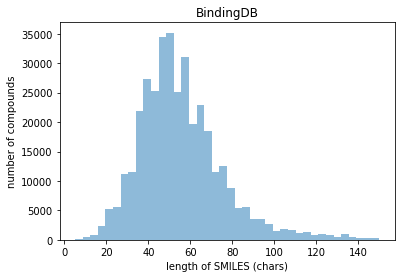

In [4]:
%matplotlib inline

drugs = df_p['Drug'].values
kd_len_drug = [len(i) for i in drugs]
plt.title('BindingDB')
plt.xlabel('length of SMILES (chars)')
plt.ylabel('number of compounds')
plt.hist(kd_len_drug,bins=40,alpha=0.5)
plt.show()

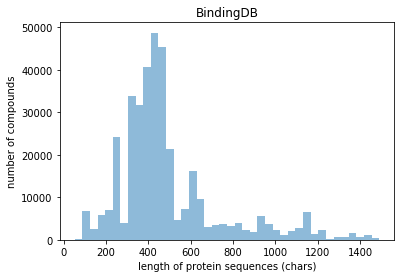

In [5]:
%matplotlib inline

targets = df_p['Target'].values
kd_len_target = [len(i) for i in targets]
plt.title('BindingDB')
plt.xlabel('length of protein sequences (chars)')
plt.ylabel('number of compounds')
plt.hist(kd_len_target,bins=40,alpha=0.5)
plt.show()

In [6]:
path = './data/BindingDB_All.tsv'

print('Loading Kd Dataset from path...')
df_kd = processors.filter_data(path, y='Kd')
df_kd_compact, _, _, _, _ = processors.process_duplicates(df_kd['SMILES'], df_kd['Target Sequence'], df_kd['Label'])

print('Loading Ki Dataset from path...')
df_ki = processors.filter_data(path, y='Ki')
df_ki_compact, _, _, _, _ = processors.process_duplicates(df_ki['SMILES'], df_ki['Target Sequence'], df_ki['Label'])

print('Combine Kd and Ki Dataset and preprocess them...')
df_kdki = pd.concat([df_kd_compact, df_ki_compact])
df_kdki_compact, _, _, _, _ = processors.process_duplicates(df_kdki['Drug'], df_kdki['Target'], df_kdki['Label'])

df_kdki_compact = processors.cutoff_by_length(df_kdki_compact['Drug'], df_kdki_compact['Target'], df_kdki_compact['Label'])
df_kdki_compact = processors.process_label_duplicates(df_kdki_compact['Drug'], df_kdki_compact['Target'], df_kdki_compact['Label'])
df_kdki_compact

Loading Kd Dataset from path...
Loading Dataset from path...


b'Skipping line 1043973: expected 193 fields, saw 205\nSkipping line 1043999: expected 193 fields, saw 205\n'
b'Skipping line 1076692: expected 193 fields, saw 205\n'
b'Skipping line 1099362: expected 193 fields, saw 265\n'
b'Skipping line 1503068: expected 193 fields, saw 241\n'
b'Skipping line 1616973: expected 193 fields, saw 241\nSkipping line 1616974: expected 193 fields, saw 241\nSkipping line 1616975: expected 193 fields, saw 241\nSkipping line 1616976: expected 193 fields, saw 241\nSkipping line 1616977: expected 193 fields, saw 241\nSkipping line 1616978: expected 193 fields, saw 241\nSkipping line 1616979: expected 193 fields, saw 241\nSkipping line 1616980: expected 193 fields, saw 241\nSkipping line 1616981: expected 193 fields, saw 241\n'
b'Skipping line 1630246: expected 193 fields, saw 205\n'
b'Skipping line 1649469: expected 193 fields, saw 241\nSkipping line 1649470: expected 193 fields, saw 241\nSkipping line 1649471: expected 193 fields, saw 241\nSkipping line 164947

Beginning Processing...
There are 53085 drug target pairs.
There are 45879 distinct Drug&Target&Label pairs out of 53085 total records.
There are 8658 distinct Drug&Target pairs out of 36940 distinct Drug&Target pairs have duplicate records.
There are 24803 records relating duplicate Drug&Target pairs.
Loading Ki Dataset from path...
Loading Dataset from path...


b'Skipping line 1043973: expected 193 fields, saw 205\nSkipping line 1043999: expected 193 fields, saw 205\n'
b'Skipping line 1076692: expected 193 fields, saw 205\n'
b'Skipping line 1099362: expected 193 fields, saw 265\n'
b'Skipping line 1503068: expected 193 fields, saw 241\n'
b'Skipping line 1616973: expected 193 fields, saw 241\nSkipping line 1616974: expected 193 fields, saw 241\nSkipping line 1616975: expected 193 fields, saw 241\nSkipping line 1616976: expected 193 fields, saw 241\nSkipping line 1616977: expected 193 fields, saw 241\nSkipping line 1616978: expected 193 fields, saw 241\nSkipping line 1616979: expected 193 fields, saw 241\nSkipping line 1616980: expected 193 fields, saw 241\nSkipping line 1616981: expected 193 fields, saw 241\n'
b'Skipping line 1630246: expected 193 fields, saw 205\n'
b'Skipping line 1649469: expected 193 fields, saw 241\nSkipping line 1649470: expected 193 fields, saw 241\nSkipping line 1649471: expected 193 fields, saw 241\nSkipping line 164947

Beginning Processing...
There are 436616 drug target pairs.
There are 392380 distinct Drug&Target&Label pairs out of 436616 total records.
There are 50819 distinct Drug&Target pairs out of 346999 distinct Drug&Target pairs have duplicate records.
There are 140436 records relating duplicate Drug&Target pairs.
Combine Kd and Ki Dataset and preprocess them...
There are 438089 distinct Drug&Target&Label pairs out of 489701 total records.
There are 60358 distinct Drug&Target pairs out of 381534 distinct Drug&Target pairs have duplicate records.
There are 168525 records relating duplicate Drug&Target pairs.
There are 467794 drug target pairs after cutoff.
Set label to logspace (nM -> p) for easier regression
There are 365021 drug target pairs after (nM -> p) and group&mean.


,Drug,Target,Label
0,BP(=O)(COCCn1cnc2c(N)ncnc12)OP(O)(=O)OP(O)(O)=O,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,5.187087
1,BP(=O)(CO[C@H](C)Cn1cnc2c(N)ncnc12)OP(O)(=O)OP...,PISPITVPVKLKPGMDGPKVKQWPLTEEKIKALTEICTEMEKEGKI...,4.481486
2,B[P@@](=O)(OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1c...,MERDGCAGGGSRGGEGGRAPREGPAGNGRDRGRSHAAEAPGDPQAA...,4.744727
3,B[P@@](=O)(OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1c...,MERDGCAGGGSRGGEGGRAPREGPAGNGRDRGRSHAAEAPGDPQAA...,6.301030
4,B[P@](=O)(OC[C@H]1O[C@H]([C@H](O)[C@@H]1O)n1cn...,MERDGCAGGGSRGGEGGRAPREGPAGNGRDRGRSHAAEAPGDPQAA...,4.251812
...,...,...,...
365016,c1nn(-c2ccccc2)c2ncncc12,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,2.397940
365017,c1nn2cccnc2c1-c1nc2ccccc2s1,MGEAEKFHYIYSCDLDINVQLKIGSLEGKREQKSYKAVLEDPMLKF...,6.387216
365018,c1nn2cccnc2c1-c1nc2ccccc2s1,MQYLNIKEDCNAMAFCAKMRSSKKTEVNLEAPEPGVEVIFYLSDRE...,6.259637
365019,c1sc(nc1-c1cccnc1)-c1ccccc1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,7.200659


In [2]:
df = processors.extract_duplicates_BindingDB_kdki('./data/BindingDB_All.tsv')
df

Loading Kd Dataset from path...
Loading Dataset from path...


b'Skipping line 1043973: expected 193 fields, saw 205\nSkipping line 1043999: expected 193 fields, saw 205\n'
b'Skipping line 1076692: expected 193 fields, saw 205\n'
b'Skipping line 1099362: expected 193 fields, saw 265\n'
b'Skipping line 1503068: expected 193 fields, saw 241\n'
b'Skipping line 1616973: expected 193 fields, saw 241\nSkipping line 1616974: expected 193 fields, saw 241\nSkipping line 1616975: expected 193 fields, saw 241\nSkipping line 1616976: expected 193 fields, saw 241\nSkipping line 1616977: expected 193 fields, saw 241\nSkipping line 1616978: expected 193 fields, saw 241\nSkipping line 1616979: expected 193 fields, saw 241\nSkipping line 1616980: expected 193 fields, saw 241\nSkipping line 1616981: expected 193 fields, saw 241\n'
b'Skipping line 1630246: expected 193 fields, saw 205\n'
b'Skipping line 1649469: expected 193 fields, saw 241\nSkipping line 1649470: expected 193 fields, saw 241\nSkipping line 1649471: expected 193 fields, saw 241\nSkipping line 164947

Beginning Processing...
There are 53085 drug target pairs.
There are 45879 distinct Drug&Target&Label pairs out of 53085 total records.
There are 8658 distinct Drug&Target pairs out of 36940 distinct Drug&Target pairs have duplicate records.
There are 24803 records relating duplicate Drug&Target pairs.
Loading Ki Dataset from path...
Loading Dataset from path...


b'Skipping line 1043973: expected 193 fields, saw 205\nSkipping line 1043999: expected 193 fields, saw 205\n'
b'Skipping line 1076692: expected 193 fields, saw 205\n'
b'Skipping line 1099362: expected 193 fields, saw 265\n'
b'Skipping line 1503068: expected 193 fields, saw 241\n'
b'Skipping line 1616973: expected 193 fields, saw 241\nSkipping line 1616974: expected 193 fields, saw 241\nSkipping line 1616975: expected 193 fields, saw 241\nSkipping line 1616976: expected 193 fields, saw 241\nSkipping line 1616977: expected 193 fields, saw 241\nSkipping line 1616978: expected 193 fields, saw 241\nSkipping line 1616979: expected 193 fields, saw 241\nSkipping line 1616980: expected 193 fields, saw 241\nSkipping line 1616981: expected 193 fields, saw 241\n'
b'Skipping line 1630246: expected 193 fields, saw 205\n'
b'Skipping line 1649469: expected 193 fields, saw 241\nSkipping line 1649470: expected 193 fields, saw 241\nSkipping line 1649471: expected 193 fields, saw 241\nSkipping line 164947

Beginning Processing...
There are 436616 drug target pairs.
There are 392380 distinct Drug&Target&Label pairs out of 436616 total records.
There are 50819 distinct Drug&Target pairs out of 346999 distinct Drug&Target pairs have duplicate records.
There are 140436 records relating duplicate Drug&Target pairs.
Combine Kd and Ki Dataset and preprocess them...
There are 438089 distinct Drug&Target&Label pairs out of 489701 total records.
There are 60358 distinct Drug&Target pairs out of 381534 distinct Drug&Target pairs have duplicate records.
There are 168525 records relating duplicate Drug&Target pairs.
There are 467794 drug target pairs after cutoff.
Set label to logspace (nM -> p) for easier regression
There are 56893 duplicated drug target pairs after (nM -> p) and group&min&max&mean.


Drug  \
                                             
0      Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1   
1      Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1   
2      Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1   
3      Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1   
4      Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1   
...                                    ...   
56888                           c1cn[nH]c1   
56889    c1coc(c1)-c1nnc2sc(nn12)-c1ccccn1   
56890                     c1n[nH]c2ccccc12   
56891                c1nc(c[nH]1)-c1cccnc1   
56892                     c1nc2ccccc2[nH]1   

                                                  Target     Label            \
                                                               min       max   
0      MALSYRVSELQSTIPEHILQSTFVHVISSNWSGLQTESIPEEMKQI...  7.744727  7.744727   
1      MASLSQLSSHLNYTCGAENSTGASQARPHAYYALSYCALILAIVFG...  7.096910  7.102373   
2      MDILCEENTSLSSTTNSLMQLNDDTRLYSNDFNSGEANTSDAFNWT...  5.688034  5.689944   
3      MDVLSPGQGNNTTSPPAPFETGGNTTGISDVTVSYQVITSLLLGTL...  7.022276  7.022276   
4      MGNSSATGDGGLLAGRGPESLGTGTGLGGAGAAALVGGVLLIGMVL...  7.387216  7.387216   
...                                                  ...       ...       ...   
56888  MSTAGKVIKCKAAVLWEQKKPFSIEEVEVAPPKAHEVRIKMVAAGI...  5.730020  6.698970   
56889  MADEAALALQPGGSPSAAGADREAASSPAGEPLRKRPRRDGPGLER...  4.229885  6.221849   
56890  MAHAMENSWTISKEYHIDEEVGFALPNPQENLPDFYNDWMFIAKHL...  3.443697  4.091515   
56891  MLASGMLLVALLVCLTVMVLMSVWQQRKSKGKLPPGPTPLPFIGNY...  6.096910  6.602060   
56892  MAGGRHRRVVGTLHLLLLVAALPWASRGVSPSASAWPEEKNYHQPA...  3.823909  3.860121   

                                           
      count    median      mean      diff  
0         2  7.744727  7.744727  0.000000  
1         2  7.099641  7.099641  0.005463  
2         2  5.688989  5.688989  0.001910  
3         2  7.022276  7.022276  0.000000  
4         2  7.387216  7.387216  0.000000  
...     ...       ...       ...       ...  
56888     2  6.214495  6.214495  0.968950  
56889     4  4.512903  4.869385  1.991964  
56890     2  3.767606  3.767606  0.647817  
56891     2  6.349485  6.349485  0.505150  
56892     2  3.842015  3.842015  0.036212  

[56893 rows x 8 columns]

In [3]:
df.to_csv('./data/kdki_dataset_duplicates_agg.csv', index=False)

In [2]:
df = pd.read_csv('./data/kdki_dataset_duplicates_agg.csv', sep = ',', error_bad_lines=False)
df

,Drug,Target,Label,Label.1,Label.2,Label.3,Label.4,Label.5
0,NaN,NaN,min,max,count,median,mean,diff
1,Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1,MALSYRVSELQSTIPEHILQSTFVHVISSNWSGLQTESIPEEMKQI...,7.7447274948966935,7.7447274948966935,2,7.7447274948966935,7.7447274948966935,0.0
2,Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1,MASLSQLSSHLNYTCGAENSTGASQARPHAYYALSYCALILAIVFG...,7.096910013008056,7.102372908709558,2,7.099641460858807,7.099641460858807,0.005462895701501935
3,Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1,MDILCEENTSLSSTTNSLMQLNDDTRLYSNDFNSGEANTSDAFNWT...,5.688034339631634,5.689944262249108,2,5.688989300940371,5.688989300940371,0.0019099226174743578
4,Br.C(CN1CCc2ccccc2C1)Cc1nc2ccccc2s1,MDVLSPGQGNNTTSPPAPFETGGNTTGISDVTVSYQVITSLLLGTL...,7.022276394711152,7.022276394711152,2,7.022276394711152,7.022276394711152,0.0
...,...,...,...,...,...,...,...,...
56889,c1cn[nH]c1,MSTAGKVIKCKAAVLWEQKKPFSIEEVEVAPPKAHEVRIKMVAAGI...,5.730020323354676,6.698970004336019,2,6.214495163845347,6.214495163845347,0.9689496809813427
56890,c1coc(c1)-c1nnc2sc(nn12)-c1ccccn1,MADEAALALQPGGSPSAAGADREAASSPAGEPLRKRPRRDGPGLER...,4.229884705212898,6.221848749616356,4,4.512903100014633,4.8693849137146294,1.991964044403458
56891,c1n[nH]c2ccccc12,MAHAMENSWTISKEYHIDEEVGFALPNPQENLPDFYNDWMFIAKHL...,3.4436974992327127,4.0915149811213505,2,3.767606240177032,3.767606240177032,0.6478174818886377
56892,c1nc(c[nH]1)-c1cccnc1,MLASGMLLVALLVCLTVMVLMSVWQQRKSKGKLPPGPTPLPFIGNY...,6.096910013008056,6.6020599913279625,2,6.349485002168009,6.349485002168009,0.5051499783199063


In [4]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'